In [1]:
import pandas as pd
import numpy as np
import scipy
import os


In [2]:
#Chemins vers le répertoire courant, les sources de données et le répertoire donnant accès aux soumissions
_REP_PATH_ = os.getcwd()
_REP_DATA_PATH_ = _REP_PATH_+'/data/'
_REP_OUT_PATH_ = _REP_PATH_ + '/output/'

In [3]:
data=pd.read_csv(_REP_DATA_PATH_+"train.csv")
data

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,2909,28,18,182,58,1350,210,197,117,...,0,0,0,0,0,0,0,0,0,2
1,1,2757,334,30,212,83,1384,137,184,177,...,0,0,0,0,0,0,0,0,0,2
2,2,3283,248,4,150,15,5601,211,243,170,...,0,0,0,0,0,0,1,0,0,1
3,3,3019,330,14,541,-101,1811,186,222,175,...,0,0,0,0,0,0,0,0,0,2
4,4,3039,340,20,474,74,3407,175,207,169,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2521,187,17,30,1,1099,220,250,158,...,0,0,0,0,0,0,0,0,0,6
99996,99996,2891,341,16,30,9,3774,186,215,167,...,0,0,0,0,0,0,0,0,0,2
99997,99997,2563,129,9,134,18,569,236,235,129,...,0,0,0,0,0,0,0,0,0,2
99998,99998,3322,238,14,153,32,2773,195,251,192,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X_train=data.drop(columns=["Cover_Type"])
y_train=data['Cover_Type']


In [5]:
X_test=pd.read_csv(_REP_DATA_PATH_+"test.csv")

In [6]:
#Supprimer les colonnes d'identification
X_test=X_test.drop(columns=["row_ID"])
X_train=X_train.drop(columns=['Unnamed: 0'])

# Implémentation d'une méthode d'oversampling (SMOTE) et évaluation de notre méthode sur un ensemble de validation

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train,y_train)



In [9]:
y_train.value_counts()

Cover_Type
2    48676
1    36410
3     6273
7     3568
6     2967
5     1635
4      471
Name: count, dtype: int64

In [10]:
y_sm.value_counts() #Oversamplés à hauteur de la classe majoritaire

Cover_Type
2    48676
1    48676
7    48676
4    48676
3    48676
6    48676
5    48676
Name: count, dtype: int64

In [11]:
XB_train, XB_test, yB_train, yB_test = train_test_split(X_train,y_train,train_size=0.75, random_state=42)
XS_train, XS_test, yS_train, yS_test = train_test_split(X_sm,y_sm,train_size=0.75,random_state=42)

In [12]:



rf_SMOTE_model = RandomForestClassifier(random_state=42)
rf_BASE_model = RandomForestClassifier(random_state=42)

rf_BASE_model.fit(XB_train,yB_train)



rf_SMOTE_model.fit(XS_train,yS_train)


yB_test_prediction = rf_BASE_model.predict(XB_test)
yS_test_prediction = rf_SMOTE_model.predict(XS_test)
BASE_test_acc = accuracy_score(yB_test,yB_test_prediction)
SMOTE_test_acc = accuracy_score(yS_test,yS_test_prediction)
print(f"Base model test accuracy: {BASE_test_acc}")
print(f"SMOTE model test accuracy: {SMOTE_test_acc}")


Base model test accuracy: 0.90088
SMOTE model test accuracy: 0.9749010952889661


In [13]:
print(f1_score(yB_test,yB_test_prediction, average="weighted"))
print(f1_score(yS_test,yS_test_prediction,average="weighted"))
#0.8994 vs 0.97478(SMOTE)

0.8994565201477261
0.9747787257559616


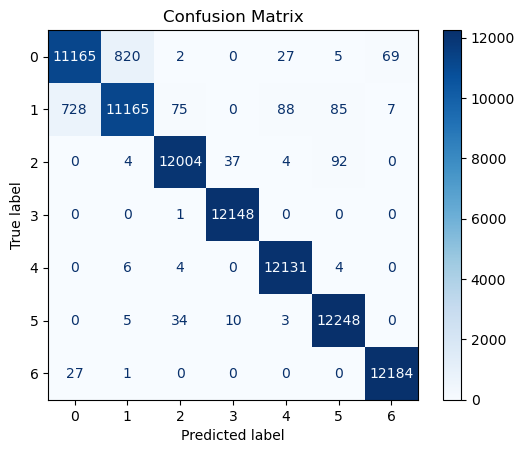

In [14]:

cm = confusion_matrix(yS_test, yS_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



In [15]:
print(classification_report(yS_test,yS_test_prediction))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93     12088
           2       0.93      0.92      0.92     12148
           3       0.99      0.99      0.99     12141
           4       1.00      1.00      1.00     12149
           5       0.99      1.00      0.99     12145
           6       0.99      1.00      0.99     12300
           7       0.99      1.00      1.00     12212

    accuracy                           0.97     85183
   macro avg       0.97      0.97      0.97     85183
weighted avg       0.97      0.97      0.97     85183



In [16]:
print(classification_report(yB_test,yB_test_prediction))

              precision    recall  f1-score   support

           1       0.92      0.88      0.90      9056
           2       0.90      0.94      0.92     12236
           3       0.87      0.92      0.89      1540
           4       0.79      0.68      0.73        95
           5       0.88      0.51      0.64       440
           6       0.87      0.74      0.80       762
           7       0.93      0.87      0.90       871

    accuracy                           0.90     25000
   macro avg       0.88      0.79      0.83     25000
weighted avg       0.90      0.90      0.90     25000



# Implémentation du modèle RandomForest sur l'échantillon oversamplé

In [18]:
rf_best=RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42)

In [19]:
rf_best.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42)

# Phase de prédiction

In [21]:
y_pred=rf_best.predict(X_test)



In [22]:
submission_df = pd.DataFrame({
    'row_ID': X_test.index,   
    'Cover_Type': y_pred      
})

submission_df.to_csv(_REP_OUT_PATH_ + 'prediction_rf_smote.csv', index=False)

In [23]:
from joblib import load, dump
#Sauvegarder le modèle
#dump(rf_best, 'rf_smote.joblib')

In [24]:
features_scores=pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_scores

Elevation                             0.276894
Horizontal_Distance_To_Roadways       0.108570
Horizontal_Distance_To_Fire_Points    0.083685
Wilderness_Area4                      0.066860
Horizontal_Distance_To_Hydrology      0.055210
Vertical_Distance_To_Hydrology        0.040367
Hillshade_9am                         0.038205
Wilderness_Area1                      0.035768
Aspect                                0.034010
Hillshade_Noon                        0.030125
Hillshade_3pm                         0.029776
Wilderness_Area3                      0.027215
Slope                                 0.022709
Soil_Type10                           0.021610
Soil_Type38                           0.013796
Soil_Type39                           0.012869
Soil_Type3                            0.012432
Soil_Type4                            0.010290
Wilderness_Area2                      0.007643
Soil_Type30                           0.006790
Soil_Type29                           0.005962
Soil_Type40  

# Histogramme des probabilités prédites par le Random Forest pour chaque classe

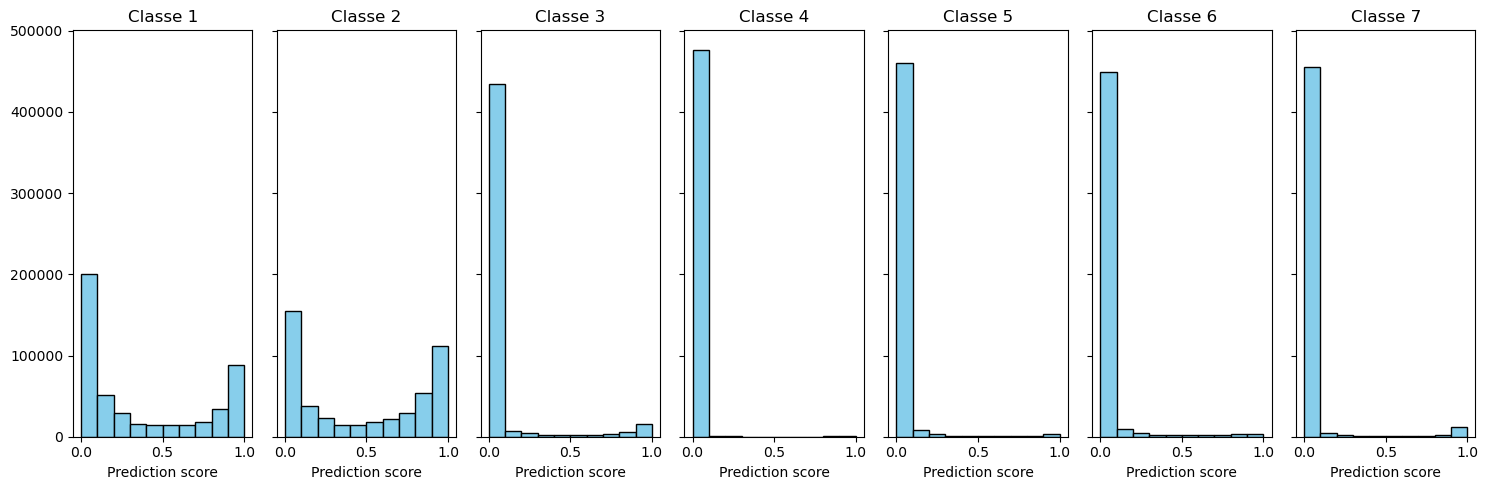

In [26]:

y_pred_proba = rf_best.predict_proba(X_test)
num_classes = y_pred_proba.shape[1]

fig, axes = plt.subplots(1, num_classes, figsize=(15, 5), sharey=True)


for i in range(num_classes):
    axes[i].hist(y_pred_proba[:, i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Classe {i+1}')
    axes[i].set_xlabel("Prediction score")


plt.tight_layout()
plt.show()

In [27]:
submission_df['Cover_Type'].value_counts()

Cover_Type
2    237271
1    171557
3     31001
7     17002
6     14513
5      7422
4      2246
Name: count, dtype: int64